# Final Code

## Import data and packages

In [2]:
#=== pandas
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

#=== numpy
import numpy as np

#=== plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#=== others
import warnings
warnings.filterwarnings("ignore")
import math
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

!mkdir -p drive
!google-drive-ocamlfuse drive

import os
os.chdir("/content/drive/My Drive/Colab Notebooks/digital_mkt/Final")
print(os.listdir(os.getcwd())) 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/bin/bash: google-drive-ocamlfuse: command not found
['engagement', 'subscribers', 'customer_service_reps', 'subscribers_sample.xlsx', 'customer_service_reps_sample.xlsx', 'engagement_sample.xlsx', 'Mevod final case instructions.pdf', 'drive', 'graph', 'advertising_spend_data.xlsx', 'Final_code.ipynb']


In [4]:
engagement = pd.read_pickle('engagement')
subscribers = pd.read_pickle('subscribers')
customer_service_reps = pd.read_pickle('customer_service_reps')
advertising_spend = pd.read_excel('advertising_spend_data.xlsx',header=2)

'''
• A subscriber data set, “subscribers”. Each record is a past or current subscriber to your 
service.

• A customer service representative data set “customer_service_reps”. Each record is a 
customer service representative who serves multiple subscribers.

• A product usage data set, “engagement”. Each record is a measure of product 
engagement for a given subscriber on a given date (if the subscriber had any 
engagement on that date).

• Advertising spend, “advertising spend”. Total spent per select channels per month.
'''

'\n• A subscriber data set, “subscribers”. Each record is a past or current subscriber to your \nservice.\n\n• A customer service representative data set “customer_service_reps”. Each record is a \ncustomer service representative who serves multiple subscribers.\n\n• A product usage data set, “engagement”. Each record is a measure of product \nengagement for a given subscriber on a given date (if the subscriber had any \nengagement on that date).\n\n• Advertising spend, “advertising spend”. Total spent per select channels per month.\n'

## Descriptive Analysis

### subscribers

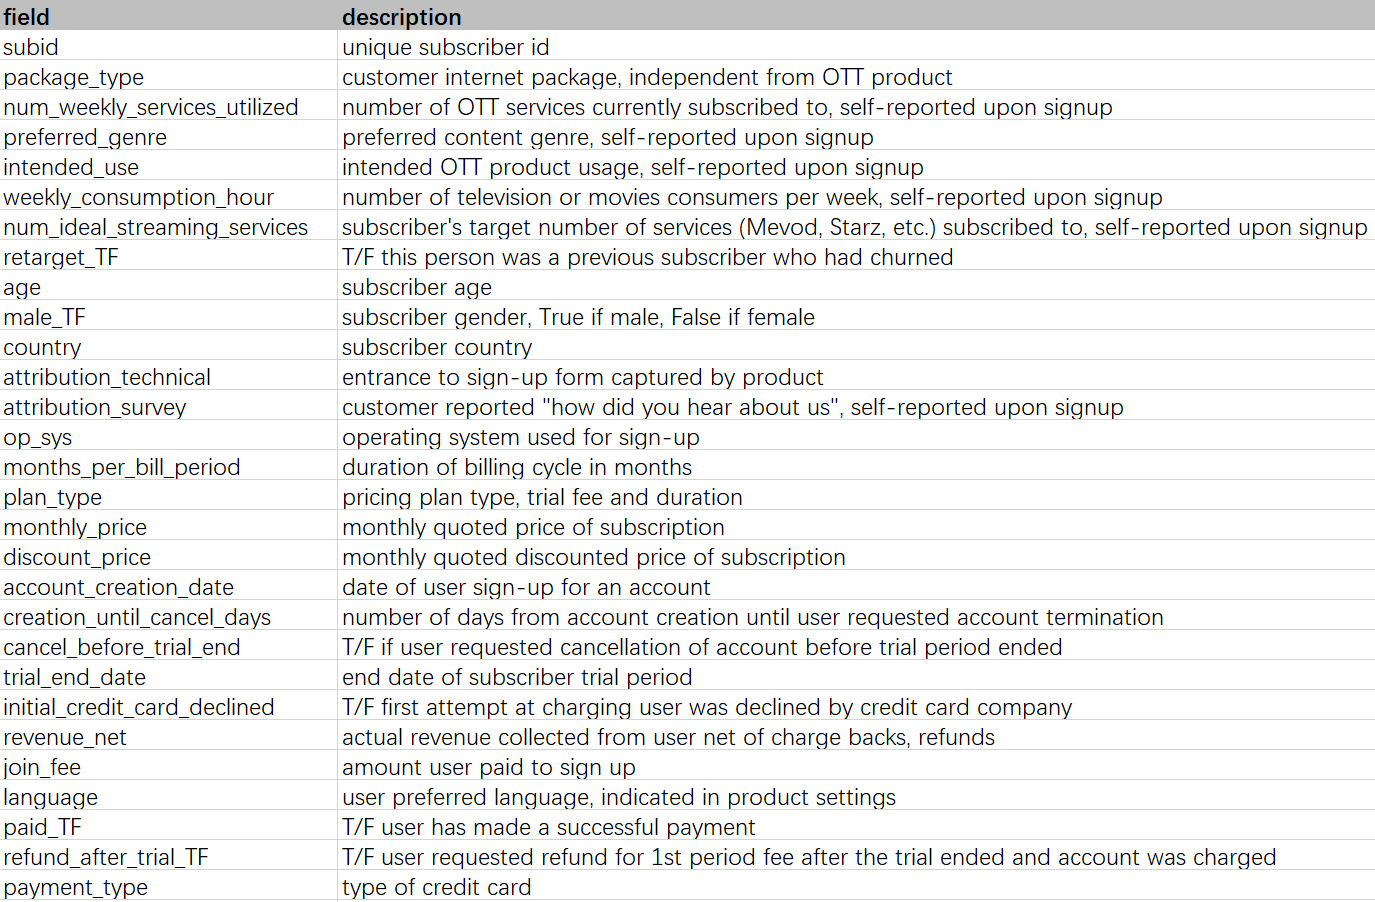

In [9]:
from IPython.display import Image
Image(filename = 'graph/subscriber.jpg', width=1000, height=600)

In [7]:
#========= Look at data
subscribers

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,NaN,ar,True,False,Standard Charter
380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,False,70.0,False,UAE,facebook,facebook,NaN,4,base_uae_14_day_trial,4.7343,4.5141,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0000,0.3303,ar,False,False,NaN
496617,26844789,enhanced,3.362885,regional,replace OTT,36.001186,1.951776,False,25.0,True,UAE,organic,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,0.1101,ar,False,False,NaN
356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,False,30.0,False,UAE,search,tv,Android,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0000,0.0367,ar,False,False,NaN
681701,26723159,base,3.731089,comedy,replace OTT,22.951579,2.506384,False,28.0,False,UAE,discovery,youtube,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0000,0.0367,ar,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,2.594078,comedy,supplement OTT,28.751405,1.905485,False,38.0,False,UAE,facebook,facebook_organic,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-17 14:12:33,8.0,False,2019-12-02,False,0.0000,0.3303,ar,False,False,NaN
229587,25843074,enhanced,2.361370,comedy,replace OTT,27.301448,1.835189,True,49.0,False,UAE,google_organic,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-06 18:02:13,NaN,True,2019-12-21,False,4.5875,0.3303,ar,True,False,Paypal
281340,24799085,base,NaN,comedy,access to exclusive content,31.651317,NaN,False,45.0,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-21 19:40:44,31.0,True,2020-01-05,True,0.0000,0.0367,ar,False,False,NaN
87198,21308040,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2020-01-17 23:58:51,NaN,True,2020-02-01,False,NaN,NaN,ar,True,False,Paypal


In [5]:
#========= check whether subid is duplicated
sum(subscribers['subid'].value_counts() == 2)

'''
0
'''

#========= check the number of subid
len(subscribers['subid'].unique())

subscribers_id = subscribers['subid']
'''
227628
'''


#========= look at paid customers
# 'what is cancel_before_trial_end '??

current_df = subscribers[['subid','package_type','retarget_TF','plan_type',
            'account_creation_date','creation_until_cancel_days','cancel_before_trial_end','trial_end_date',
            'initial_credit_card_declined','revenue_net','paid_TF']]
current_df



,subid,package_type,retarget_TF,plan_type,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,paid_TF
162502,21724479,economy,False,base_uae_14_day_trial,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,True
380374,23383224,base,False,base_uae_14_day_trial,2020-03-01 15:44:35,0.0,False,2020-03-16,False,0.0000,False
496617,26844789,enhanced,False,base_uae_14_day_trial,2019-12-07 16:37:06,1.0,False,2019-12-22,False,0.0000,False
356799,29417030,base,False,base_uae_14_day_trial,2020-01-27 16:09:32,0.0,False,2020-02-11,False,0.0000,False
681701,26723159,base,False,base_uae_14_day_trial,2019-10-05 12:57:07,9.0,False,2019-10-20,False,0.0000,False
...,...,...,...,...,...,...,...,...,...,...,...
509326,21434712,enhanced,False,base_uae_14_day_trial,2019-11-17 14:12:33,8.0,False,2019-12-02,False,0.0000,False
229587,25843074,enhanced,True,base_uae_14_day_trial,2019-12-06 18:02:13,NaN,True,2019-12-21,False,4.5875,True
281340,24799085,base,False,base_uae_14_day_trial,2019-12-21 19:40:44,31.0,True,2020-01-05,True,0.0000,False
87198,21308040,base,False,base_uae_14_day_trial,2020-01-17 23:58:51,NaN,True,2020-02-01,False,NaN,True


In [6]:
current_df.loc[current_df['paid_TF'] == True] # a lot with 'cancel_before_trial_end'

# subscribers.loc[subscribers['cancel_before_trial_end'] == False] # a lot

# subscribers.loc[(subscribers['cancel_before_trial_end'] == False) & (subscribers['paid_TF'] == True)] # none of customers belong to this

# subscribers.loc[(subscribers['paid_TF'] == True) & (subscribers['cancel_before_trial_end'] == True)]

# subscribers['cancel_before_trial_end'] == subscribers['paid_TF']

# subscribers.loc[(subscribers['cancel_before_trial_end'] == True) & (subscribers['paid_TF'] == False)]

,subid,package_type,retarget_TF,plan_type,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,paid_TF
162502,21724479,economy,False,base_uae_14_day_trial,2020-01-24 21:44:16,NaN,True,2020-02-08,False,NaN,True
284782,24810928,base,False,base_uae_14_day_trial,2020-03-03 20:15:43,71.0,True,2020-03-18,False,0.0000,True
192823,29726122,base,False,base_uae_14_day_trial,2020-02-19 18:30:15,NaN,True,2020-03-05,False,4.5875,True
315863,20299962,base,False,base_uae_14_day_trial,2020-03-05 14:52:22,NaN,True,2020-03-20,False,3.4498,True
99989,21191741,NaN,False,base_uae_14_day_trial,2019-07-11 16:00:42,158.0,True,2019-07-26,False,9.2117,True
...,...,...,...,...,...,...,...,...,...,...,...
243775,26828621,base,False,base_uae_14_day_trial,2020-02-26 02:12:05,NaN,True,2020-03-12,False,-0.6973,True
136817,28920930,enhanced,False,base_uae_14_day_trial,2019-09-14 18:31:21,NaN,True,2019-09-29,False,NaN,True
230734,21928274,base,False,base_uae_14_day_trial,2020-01-14 02:04:52,NaN,True,2020-01-29,False,NaN,True
229587,25843074,enhanced,True,base_uae_14_day_trial,2019-12-06 18:02:13,NaN,True,2019-12-21,False,4.5875,True


In [7]:
#========= check the type of each attributes
subscribers.dtypes

'''
subid                                    int64
package_type                            object
num_weekly_services_utilized           float64
preferred_genre                         object
intended_use                            object
weekly_consumption_hour                float64
num_ideal_streaming_services           float64
retarget_TF                               bool
age                                    float64
male_TF                                 object
country                                 object
attribution_technical                   object
attribution_survey                      object
op_sys                                  object
months_per_bill_period                   int64
plan_type                               object
monthly_price                          float64
discount_price                         float64
account_creation_date           datetime64[ns]
creation_until_cancel_days             float64
cancel_before_trial_end                   bool
trial_end_date                  datetime64[ns]
initial_credit_card_declined              bool
revenue_net                            float64
join_fee                               float64
language                                object
paid_TF                                   bool
refund_after_trial_TF                     bool
payment_type                            object
'''

#========= create the list of dtype attri
attri_ob = list(subscribers.dtypes[subscribers.dtypes == 'object'].index)
attri_fl = list(subscribers.dtypes[subscribers.dtypes == 'float64'].index)

#========= see the remaining columns
set(subscribers.columns).difference(set(attri_fl + attri_ob))

'''
{'account_creation_date',
 'cancel_before_trial_end',
 'initial_credit_card_declined',
 'months_per_bill_period',
 'paid_TF',
 'refund_after_trial_TF',
 'retarget_TF',
 'subid',
 'trial_end_date'}
'''

print(attri_ob)

['package_type', 'preferred_genre', 'intended_use', 'male_TF', 'country', 'attribution_technical', 'attribution_survey', 'op_sys', 'plan_type', 'language', 'payment_type']


In [0]:
#========= describe the data of all float attri
subscribers.describe()

,subid,num_weekly_services_utilized,weekly_consumption_hour,num_ideal_streaming_services,age,months_per_bill_period,monthly_price,discount_price,creation_until_cancel_days,revenue_net,join_fee
count,2.276280e+05,117178.000000,189698.000000,115458.000000,1.924590e+05,227628.0,227628.000000,227628.000000,151768.000000,192724.000000,192724.000000
mean,2.498624e+07,2.998568,27.997724,1.999848,7.579755e+02,4.0,4.732049,4.512188,16.570832,1.557353,0.115145
std,2.885543e+06,0.748752,4.976341,0.249508,1.920204e+05,0.0,0.101049,0.097078,35.777986,3.068829,0.176971
min,2.000001e+07,0.049049,-32.146760,-0.919933,0.000000e+00,4.0,0.807400,0.770700,-108.000000,-5.982100,-0.660600
25%,2.248998e+07,2.493926,24.401536,1.867354,3.500000e+01,4.0,4.734300,4.514100,2.000000,0.000000,0.036700
50%,2.497011e+07,2.760506,27.301448,1.908159,4.600000e+01,4.0,4.734300,4.514100,8.000000,0.000000,0.036700
75%,2.749020e+07,3.271574,30.201361,1.953559,5.700000e+01,4.0,4.734300,4.514100,13.000000,2.532300,0.110100
max,2.999998e+07,14.335378,76.599962,6.955714,8.172000e+07,4.0,5.101300,5.027900,312.000000,15.634200,0.734000


In [25]:
subscribers.sort_values(by='creation_until_cancel_days').tail(30)

,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,retarget_TF,age,male_TF,country,attribution_technical,attribution_survey,op_sys,months_per_bill_period,plan_type,monthly_price,discount_price,account_creation_date,creation_until_cancel_days,cancel_before_trial_end,trial_end_date,initial_credit_card_declined,revenue_net,join_fee,language,paid_TF,refund_after_trial_TF,payment_type
130010,20588003,base,2.538110,drama,access to exclusive content,25.851492,1.684862,False,60.0,False,UAE,email_blast,referral,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-24 03:15:10,NaN,True,2019-12-09,False,6.4225,0.0000,ar,True,False,Standard Charter
128707,27914665,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-18 23:32:10,NaN,True,2020-01-02,False,NaN,NaN,ar,True,False,Paypal
30377,24521090,base,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,False,UAE,organic,public_radio,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-08-22 03:05:26,NaN,True,2019-09-06,False,NaN,NaN,ar,True,False,Standard Charter
225428,25341091,enhanced,2.435013,drama,replace OTT,24.401536,1.835121,False,59.0,False,UAE,pinterest,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-26 12:55:23,NaN,True,2019-12-11,False,9.2117,0.6606,ar,True,False,Standard Charter
185590,25113375,economy,NaN,comedy,supplement OTT,NaN,NaN,False,NaN,False,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-11-28 12:27:54,NaN,True,2019-12-13,False,NaN,NaN,ar,True,False,Standard Charter
27256,24129353,base,NaN,comedy,supplement OTT,NaN,NaN,True,NaN,False,UAE,brand sem intent google,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-08-31 15:08:50,NaN,True,2019-09-15,False,NaN,NaN,ar,True,False,RAKBANK
201247,27817975,enhanced,NaN,comedy,access to exclusive content,NaN,NaN,False,NaN,True,UAE,facebook,facebook,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-12-22 00:52:30,NaN,True,2020-01-06,False,NaN,NaN,ar,True,False,Paypal
93382,27110337,enhanced,4.432154,international,supplement OTT,24.401536,2.326845,False,20.0,False,UAE,email,search,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-08-24 02:43:39,NaN,True,2019-09-08,False,4.5875,0.0000,ar,True,False,Standard Charter
184528,29072415,base,5.793032,drama,access to exclusive content,31.651317,2.602399,False,46.0,False,UAE,email_blast,tv,iOS,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-11 13:16:33,NaN,True,2019-10-26,False,3.2296,0.0000,ar,True,False,Najim
225965,26829242,economy,NaN,comedy,replace OTT,37.451142,NaN,False,69.0,True,UAE,facebook,facebook,Android,4,base_uae_14_day_trial,4.7343,4.5141,2019-10-19 04:51:41,NaN,True,2019-11-03,False,4.5875,0.0367,ar,True,False,Standard Charter


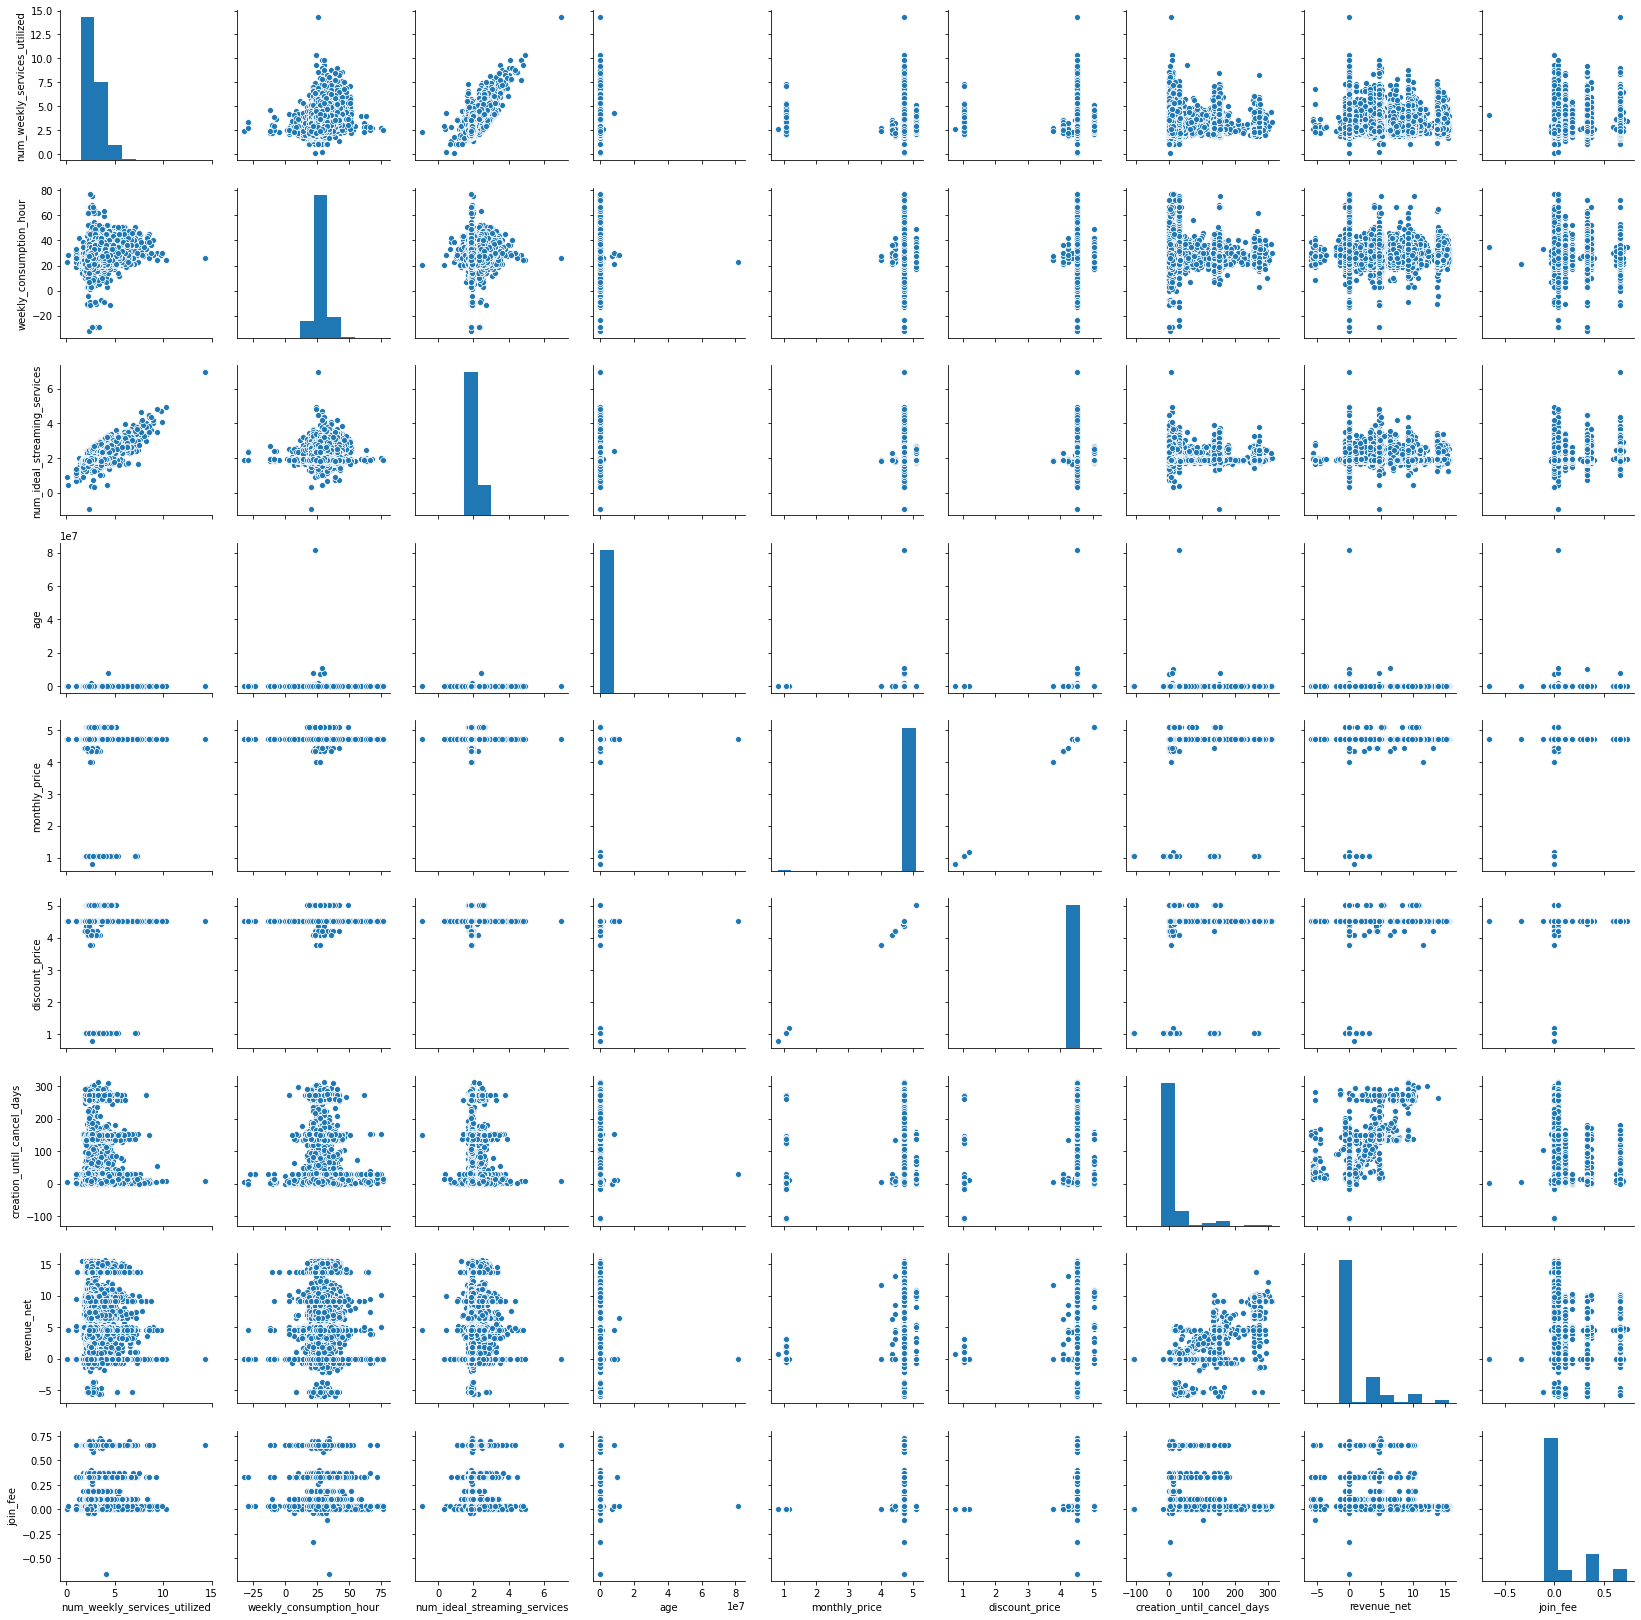

In [0]:
sns.pairplot(subscribers[attri_fl])

In [8]:
#========= describe the data of all object attri

pd.set_option('display.max_rows',None)
pd.DataFrame(subscribers[attri_ob].apply(pd.value_counts,axis=0).T.stack(),columns=['counts']).reset_index().\
        sort_values(by=['level_0','counts'],ascending=[True,False])


,level_0,level_1,counts
52,attribution_survey,facebook,119126.0
62,attribution_survey,tv,39904.0
56,attribution_survey,referral,20882.0
53,attribution_survey,search,8492.0
55,attribution_survey,pinterest,7856.0
51,attribution_survey,other,6496.0
63,attribution_survey,public_radio,6219.0
64,attribution_survey,social_organic,3869.0
59,attribution_survey,youtube,3108.0
58,attribution_survey,podcast,2995.0


In [9]:
#========= Check how many attri have nan value

#print(list(subscribers.isnull().any()[subscribers.isnull().any() == True].index))
attri_nan = list(subscribers.isnull().any()[subscribers.isnull().any() == True].index)
"""

['package_type', 'num_weekly_services_utilized', 'preferred_genre', 'intended_use', 
'weekly_consumption_hour', 'num_ideal_streaming_services', 'age', 'male_TF', 'attribution_survey', 
'op_sys', 'creation_until_cancel_days', 'revenue_net', 'join_fee', 'payment_type']

"""

#========= Check the portion of nan value for each attri
subscribers[attri_nan].isnull().apply(lambda x: sum(x) / len(x),axis=0).sort_values(ascending=False)

payment_type                    0.595612
num_ideal_streaming_services    0.492778
num_weekly_services_utilized    0.485222
creation_until_cancel_days      0.333263
weekly_consumption_hour         0.166632
preferred_genre                 0.159585
package_type                    0.156281
age                             0.154502
join_fee                        0.153338
revenue_net                     0.153338
op_sys                          0.058758
intended_use                    0.015591
attribution_survey              0.011615
male_TF                         0.001182
dtype: float64

### engagement

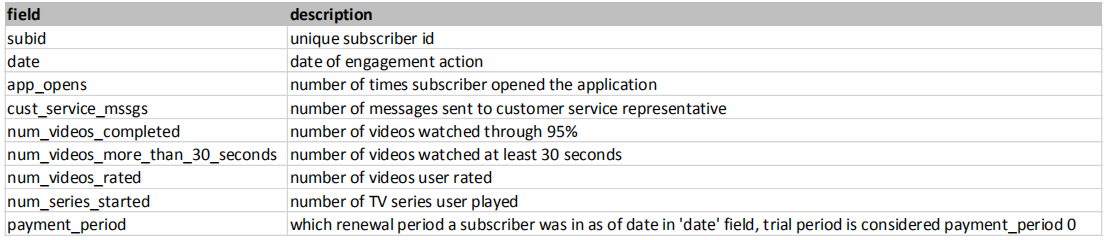

In [31]:
Image(filename = 'graph/engagement.jpg', width=800, height=200)

In [4]:
#========= Look at data

engagement

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
28832315,28409777,2020-04-21,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832317,28409777,2020-04-22,2.0,0.0,4.0,4.0,0.0,1.0,1.0
28832319,28409777,2020-04-23,0.0,0.0,4.0,4.0,0.0,1.0,1.0
28832321,28409777,2020-04-24,1.0,0.0,3.0,4.0,1.0,1.0,1.0


In [40]:
#========= describe the data of all float attri
engagement.describe()

,subid,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
count,2.585724e+06,2.551113e+06,2.551113e+06,2.551113e+06,2.551113e+06,2.551113e+06,2.551113e+06,2.585724e+06
mean,2.499102e+07,2.247702e+00,3.896170e-01,2.794718e+00,4.394189e+00,5.889939e-02,6.860515e-01,6.747735e-01
std,2.891154e+06,2.433315e+00,8.061742e-01,2.212746e+00,1.453039e+00,2.800921e-01,4.643331e-01,7.088157e-01
min,2.000006e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.248173e+07,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.498278e+07,1.000000e+00,0.000000e+00,4.000000e+00,4.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
75%,2.750345e+07,3.000000e+00,1.000000e+00,4.000000e+00,5.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
max,2.999994e+07,1.380000e+02,3.900000e+01,2.400000e+01,3.200000e+01,1.200000e+01,9.000000e+00,3.000000e+00


In [0]:
#========= Check how many attri have nan value

attri_nan = list(engagement.isnull().any()[engagement.isnull().any() == True].index)

'''
['app_opens', 'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started']

'''
#========= Check the portion of nan value

engagement[attri_nan].isnull().apply(lambda x: sum(x) / len(x),axis=0).sort_values(ascending=False)

'''
num_series_started                 0.013385
num_videos_rated                   0.013385
num_videos_more_than_30_seconds    0.013385
num_videos_completed               0.013385
cust_service_mssgs                 0.013385
app_opens                          0.013385
'''

#========= Hypothesis: Might be some specific customers have no records on all columns

# engagement.loc[engagement['num_series_started'].isnull() == False].isnull().sum()

'''
subid                              0
date                               0
app_opens                          0
cust_service_mssgs                 0
num_videos_completed               0
num_videos_more_than_30_seconds    0
num_videos_rated                   0
num_series_started                 0
payment_period                     0
'''
#========= Hypothesis has been confirmed

engagement_id = engagement['subid'].unique()

#========= Create a new df without nan value

engagement_1 = engagement.loc[engagement['num_series_started'].isnull() == False]


In [43]:
engagement_1.head()

,subid,date,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started,payment_period
1,22349235,2019-07-01,1.0,1.0,0.0,6.0,0.0,0.0,0.0
2,22349235,2019-07-02,1.0,0.0,0.0,5.0,0.0,0.0,0.0
3,22349235,2019-07-03,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50,20848497,2019-07-02,1.0,0.0,7.0,7.0,0.0,0.0,0.0
51,22680106,2019-07-02,2.0,1.0,7.0,7.0,0.0,1.0,0.0


In [0]:
#========= Calculate the deltatime of each id

duration =  engagement_1.groupby(by = 'subid').date.apply(lambda x: (max(x) - min(x)).days + 1)

engagement_agg = pd.DataFrame(duration)

engagement_agg.columns = ['duration']

#========= Calculate the activating duration of each id

engagement_agg['activating_day'] = engagement_1.groupby(by = 'subid').date.agg(len)

#========= Calculate the max of pay_period of each id

engagement_agg['max_period'] = engagement_1.groupby(by = 'subid').payment_period.agg(max)

#========= Aggregate other feature and take sum
data = engagement_1[['subid','app_opens','cust_service_mssgs','num_videos_completed','num_videos_more_than_30_seconds',\
              'num_videos_rated','num_series_started',]].groupby(by = 'subid').agg(sum)
              
engagement_agg = pd.merge(left=engagement_agg,right=data,left_index=True,right_index=True)

engagement_agg

In [8]:
#========= Calculate some ratio (sum of aggragation data devided by activating_day)

engagement_agg_1 = engagement_agg[['app_opens',
       'cust_service_mssgs', 'num_videos_completed',
       'num_videos_more_than_30_seconds', 'num_videos_rated',
       'num_series_started']].apply(lambda x: x / engagement_agg['activating_day'],axis = 0)

engagement_agg_1 = pd.merge(left=engagement_agg[['duration','activating_day']],right=engagement_agg_1,left_index=True,right_index=True)


engagement_agg_1

,duration,activating_day,app_opens,cust_service_mssgs,num_videos_completed,num_videos_more_than_30_seconds,num_videos_rated,num_series_started
subid,,,,,,,,
20000062,5,4,1.000000,0.750000,1.500000,5.750000,0.000000,0.250000
20000405,11,4,1.250000,1.000000,3.250000,4.250000,0.000000,0.250000
20000604,26,15,0.933333,0.333333,0.533333,4.533333,0.000000,0.066667
20000685,44,38,1.210526,0.263158,0.368421,4.342105,0.000000,0.210526
20000741,2,2,0.500000,0.500000,1.000000,3.500000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
29999740,15,14,1.071429,0.214286,0.785714,2.214286,0.000000,0.000000
29999820,10,10,1.200000,0.600000,2.200000,5.000000,0.000000,0.700000
29999822,12,5,1.000000,0.800000,0.400000,5.000000,0.000000,0.200000


### customer_service_reps

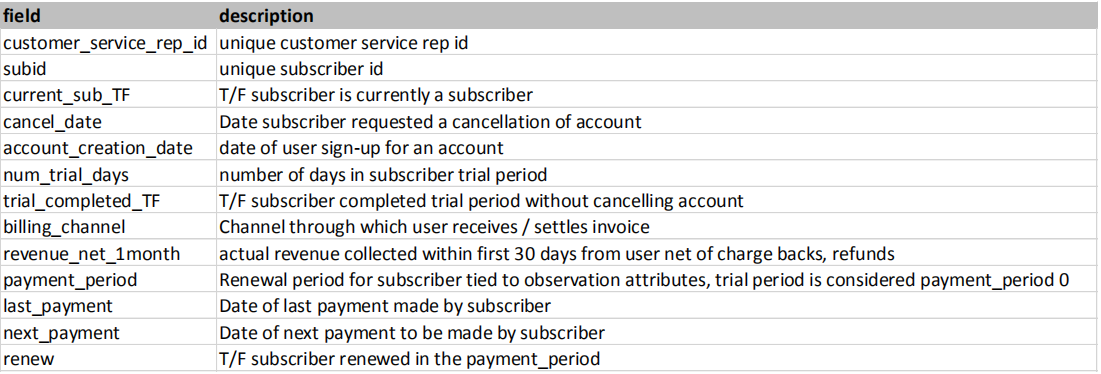

In [14]:
Image(filename = 'graph/customer service reps.jpg', width=800, height=250)

In [85]:
#========= Look at data
customer_service_reps.head(10)

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
4,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,0,2019-11-26 03:30:29,2019-11-26 03:30:29,NaN
5,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,1,2019-11-26 03:30:29,2019-12-27 03:30:29,NaN
6,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,2,2019-12-27 03:30:29,2020-01-26 03:30:29,NaN
7,36189811,25108574,False,NaT,2019-11-26 03:30:29,7,True,itunes,1.1377,3,2020-01-26 03:30:29,NaT,NaN
8,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,0,2020-03-19 01:20:25,2020-04-02 01:20:25,NaN
9,31174901,25914865,True,NaT,2020-03-19 01:20:25,14,True,itunes,1.1377,1,2020-04-02 01:20:25,NaT,NaN
10,32408758,28778936,True,NaT,2020-03-27 23:46:37,0,True,google,1.1377,0,2020-03-27 23:46:37,2020-03-28 06:47:31,NaN
11,32408758,28778936,True,NaT,2020-03-27 23:46:37,0,True,google,1.1377,1,2020-03-28 06:47:31,NaT,NaN
12,39370969,21481314,True,NaT,2020-03-27 23:09:18,0,True,google,1.1377,0,2020-03-27 23:09:18,2020-03-28 05:09:22,NaN
13,39370969,21481314,True,NaT,2020-03-27 23:09:18,0,True,google,1.1377,1,2020-03-28 05:09:22,NaT,NaN


In [93]:
customer_service_reps[['subid','num_trial_days','payment_period','last_payment']].iloc[56:62]

,subid,num_trial_days,payment_period,last_payment
60,28948735,14,0,2020-03-27 23:59:39
61,21697364,14,0,2020-03-28 00:05:20
62,27800927,14,0,2020-03-28 00:05:20
63,27800927,14,1,2020-04-11 11:05:24
64,26594255,14,0,2020-03-28 08:35:56
65,21481881,14,0,2020-03-27 23:58:57


In [6]:
#========= Check how many attri have nan value

attri_nan = list(customer_service_reps.isnull().any()[customer_service_reps.isnull().any() == True].index)

'''
['cancel_date', 'next_payment', 'renew']
'''

"\n['cancel_date', 'next_payment', 'renew']\n"

In [0]:
#========= Check the id and check the difference between ids
customer_service_reps_id = customer_service_reps['subid'].unique()

#========= compare engagement and subsceibers

# len(set(engagement_id)) # 92609

# len(set(subscribers_id)) # 227628

# len(set(customer_service_reps_id)) # 1369360

# len(set(engagement_id).difference(set(subscribers_id))) # 0 means engagement_id all belongs to subscribers_id

# len(set(subscribers_id).difference(set(customer_service_reps_id))) # 92578 means not all subscribers_id could be found in customer_service_reps_id

# len(set(engagement_id).difference(set(customer_service_reps_id))) # 0 means engagement_id all belongs to customer_service_reps_id

In [8]:
see = customer_service_reps.groupby(by='subid').num_trial_days.agg('first')
see.value_counts()

14    1281127
7       64043
0       24190
Name: num_trial_days, dtype: int64

In [0]:
#========= Check the meaning of the attributes 'trial_completed_TF'
customer_service_reps.loc[customer_service_reps['trial_completed_TF'] == False]

# len(customer_service_reps.loc[customer_service_reps['trial_completed_TF'] == False]['subid'].unique())  # 660927

#========= Merge csr and subscribers tables to check the features

customer_service_reps_1 = customer_service_reps.loc[customer_service_reps['subid'].isin(subscribers_id)]
customer_service_reps_1.drop_duplicates(subset=['subid'],keep='first',inplace = True)
customer_service_reps_1 = pd.merge(customer_service_reps_1,subscribers,on='subid')

customer_service_reps_1[[ 'subid', 'current_sub_TF', 'cancel_date',
       'account_creation_date_x', 'num_trial_days', 'trial_completed_TF',
       'revenue_net_1month','last_payment', 'next_payment', 'renew',
       'retarget_TF',  'plan_type', 'account_creation_date_y',
       'creation_until_cancel_days', 'cancel_before_trial_end',
       'trial_end_date', 'initial_credit_card_declined', 
       'revenue_net','paid_TF', 'refund_after_trial_TF',
       'payment_type']]

# sum(customer_service_reps_1['trial_completed_TF'] != customer_service_reps_1['cancel_before_trial_end'])  
#= 0, means 'trial_completed_TF' is 'cancel_before_trial_end'
#= 'trial_completed_TF' could be seen as the signal of convert

#========= check the conversion rate in merged table
#sum(customer_service_reps_1['cancel_before_trial_end']) / len(customer_service_reps_1) # 0.4619326175490559

##### very weird data

In [14]:
#========= Check the type of trial behavior

#==== First type: doesn't trial and diretly buy
customer_service_reps.loc[(customer_service_reps['payment_period']==1) & (customer_service_reps['trial_completed_TF'] == False)]

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
29140,32413499,21146065,False,NaT,2020-03-22 05:56:30,0,False,OTT,0.6606,1,2020-03-22 06:05:19,NaT,NaN
57803,31448322,23092140,False,NaT,2020-03-18 00:04:16,0,False,OTT,0.6606,1,2020-03-18 06:26:07,NaT,NaN
60834,33142229,26321222,False,2020-03-17 12:44:09,2020-03-17 03:21:25,0,False,OTT,0.0000,1,2020-03-17 06:48:00,NaT,NaN
304446,33064138,21305999,False,2020-02-29 17:45:43,2020-02-28 06:19:15,0,False,OTT,0.0000,1,2020-02-28 07:37:03,NaT,NaN
376550,31263816,20175390,False,NaT,2020-02-21 03:10:26,0,False,OTT,0.6606,1,2020-02-21 06:19:31,NaT,NaN
800288,32406972,28477738,False,NaT,2019-12-18 02:27:10,0,False,OTT,0.6606,1,2019-12-18 06:03:04,NaT,NaN
814285,38637729,26682516,False,NaT,2019-12-15 01:10:07,0,False,OTT,0.6606,1,2019-12-15 05:50:32,NaT,NaN
1269142,36369848,21632248,False,NaT,2019-10-27 00:02:06,0,False,OTT,0.4771,1,2019-10-27 05:56:18,NaT,NaN
1389766,36080216,27038535,False,2019-10-08 03:54:53,2019-10-08 03:36:01,0,False,OTT,0.0000,1,2019-10-08 04:08:02,NaT,NaN
1513857,38487241,23074720,False,NaT,2019-09-19 06:56:11,0,False,OTT,0.6606,1,2019-09-19 07:33:00,NaT,NaN


In [15]:
#==== Second type: doesn't trial and diretly buy
# customer_service_reps.loc[(customer_service_reps['num_trial_days']==0) & (customer_service_reps['trial_completed_TF']==False)]
customer_service_reps.loc[(customer_service_reps['num_trial_days']==0)]

,customer_service_rep_id,subid,current_sub_TF,cancel_date,account_creation_date,num_trial_days,trial_completed_TF,billing_channel,revenue_net_1month,payment_period,last_payment,next_payment,renew
10,32408758,28778936,True,NaT,2020-03-27 23:46:37,0,True,google,1.1377,0,2020-03-27 23:46:37,2020-03-28 06:47:31,NaN
11,32408758,28778936,True,NaT,2020-03-27 23:46:37,0,True,google,1.1377,1,2020-03-28 06:47:31,NaT,NaN
12,39370969,21481314,True,NaT,2020-03-27 23:09:18,0,True,google,1.1377,0,2020-03-27 23:09:18,2020-03-28 05:09:22,NaN
13,39370969,21481314,True,NaT,2020-03-27 23:09:18,0,True,google,1.1377,1,2020-03-28 05:09:22,NaT,NaN
14,38637729,24230000,True,NaT,2020-03-27 22:59:09,0,True,google,1.1377,0,2020-03-27 22:59:09,2020-03-28 04:59:17,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2248409,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,3,2019-08-27 20:23:27,2019-09-24 20:23:29,NaN
2248410,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,4,2019-09-24 20:23:29,2019-10-25 20:23:28,NaN
2248411,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,5,2019-10-25 20:23:28,2019-11-24 20:23:29,NaN
2248412,30859916,26845271,False,NaT,2019-06-30 06:24:24,0,True,google,0.6239,6,2019-11-24 20:23:29,2019-12-25 20:23:27,NaN


##### jump out

In [82]:
#========= Check the distribution of different kind of trial on a time series

#==== step one, suppose the signal of conversion is decided by 'trial_completed_TF' in the first payment_period

customer_service_reps_2 = customer_service_reps.drop_duplicates(subset = ['subid'], keep = 'first')
customer_service_reps_2.set_index(keys = 'last_payment',inplace = True)
outcome = customer_service_reps_2.groupby(by = [pd.Grouper(freq='1W'),'num_trial_days']).agg({'payment_period':len,'trial_completed_TF':sum})
outcome

payment_period  trial_completed_TF
last_payment num_trial_days                                    
2019-06-30   0                          182               182.0
             7                          944               944.0
             14                       18877              9488.0
2019-07-07   0                          772               772.0
             7                         5490              5490.0
...                                     ...                 ...
2020-03-22   7                          133               133.0
             14                       27751             14991.0
2020-03-29   0                          388               374.0
             7                           96                96.0
             14                       16062              8959.0

[120 rows x 2 columns]

## Question 1: AB Testing

In [0]:
#========= Compare trial 7 days and trail 14 days, suppose the signal of conversion is payment_period = 1
#==== step one, drop num_trial_days == 0
customer = customer_service_reps.loc[(customer_service_reps['num_trial_days'] == 7) | (customer_service_reps['num_trial_days'] == 14)]

#==== step two, calculate number of data of trial 7 days and 14 days
customer_1 = customer.drop_duplicates(subset=['subid'],keep='first') 
n_7 = len(customer_1.loc[customer_1['num_trial_days'] == 7]) # 64043 for 7 days
n_14 = len(customer_1.loc[customer_1['num_trial_days'] == 14]) # 1281127 for 14 days

#==== step three, calculate conversion rate trial 7 days and 14 days
#== number of converted
len(customer.loc[(customer['payment_period'] == 1) & (customer['num_trial_days'] == 7)]) # 35314 for 7days
len(customer.loc[(customer['payment_period'] == 1) & (customer['num_trial_days'] == 14)]) # 523596 for 14 days

#== conversion rate
p_7 = 35314 / 64043 # 0.5514107708883094 for 7 days
p_14 = 523596 / 1281127 # 0.4086995278375992 for 14 days



In [82]:
customer.loc[customer['payment_period'] == 0].groupby(by='num_trial_days')['trial_completed_TF'].agg(len)

num_trial_days
7       64043
14    1281127
Name: trial_completed_TF, dtype: int64

In [36]:
#========= Validate Hypothesis
#==== Null Hypothesis: p_7 hat = p_14 hat, the length of trial doesn't matter
#==== Alternative Hypothesis: the length of trial does matter
z = (p_7 - p_14) / math.sqrt((p_7 * (1 - p_7) / n_7 + p_14 * (1 - p_14) / n_14)) # 70.90511117706859

#=== adopt 95% two tail test, with z = 1.96

70.9 > 1.96 # thus reject Null Hypothesis

True

## Question 3: Advertising

In [9]:
#========= Look at data
advertising_spend

,date,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
0,2019-06-30,84800,75000,17300,21400,11900,10500,5900,6100
1,2019-07-31,60000,75600,17300,21300,12000,29800,6000,6600
2,2019-08-31,52300,76100,18100,21300,16300,65900,6200,6800
3,2019-09-30,49000,75800,18900,21300,16400,73700,6000,7400
4,2019-10-31,51300,76000,21000,21400,12200,32300,6700,7300
5,2019-11-30,56100,75900,21400,21600,11700,9800,6300,7300
6,2019-12-31,51400,76100,32100,22200,12100,3500,7200,8000
7,2020-01-31,49000,75500,33600,22700,14300,300,6700,7400
8,2020-02-29,49700,76600,30100,21700,15000,300,6400,6500
9,2020-03-31,49100,78000,22700,21200,17600,300,5900,10000


In [35]:
#========= Check the category of channel

attribution = subscribers[['account_creation_date','attribution_technical','attribution_survey']]
pd.DataFrame(attribution[['attribution_technical','attribution_survey']].apply(pd.value_counts,axis=0).T.stack(),columns=['counts']).reset_index().\
        sort_values(by=['level_0','counts'],ascending=[True,False])

,level_0,level_1,counts
36,attribution_survey,facebook,119126.0
47,attribution_survey,tv,39904.0
43,attribution_survey,referral,20882.0
44,attribution_survey,search,8492.0
40,attribution_survey,pinterest,7856.0
38,attribution_survey,other,6496.0
42,attribution_survey,public_radio,6219.0
46,attribution_survey,social_organic,3869.0
48,attribution_survey,youtube,3108.0
41,attribution_survey,podcast,2995.0


No handles with labels found to put in legend.


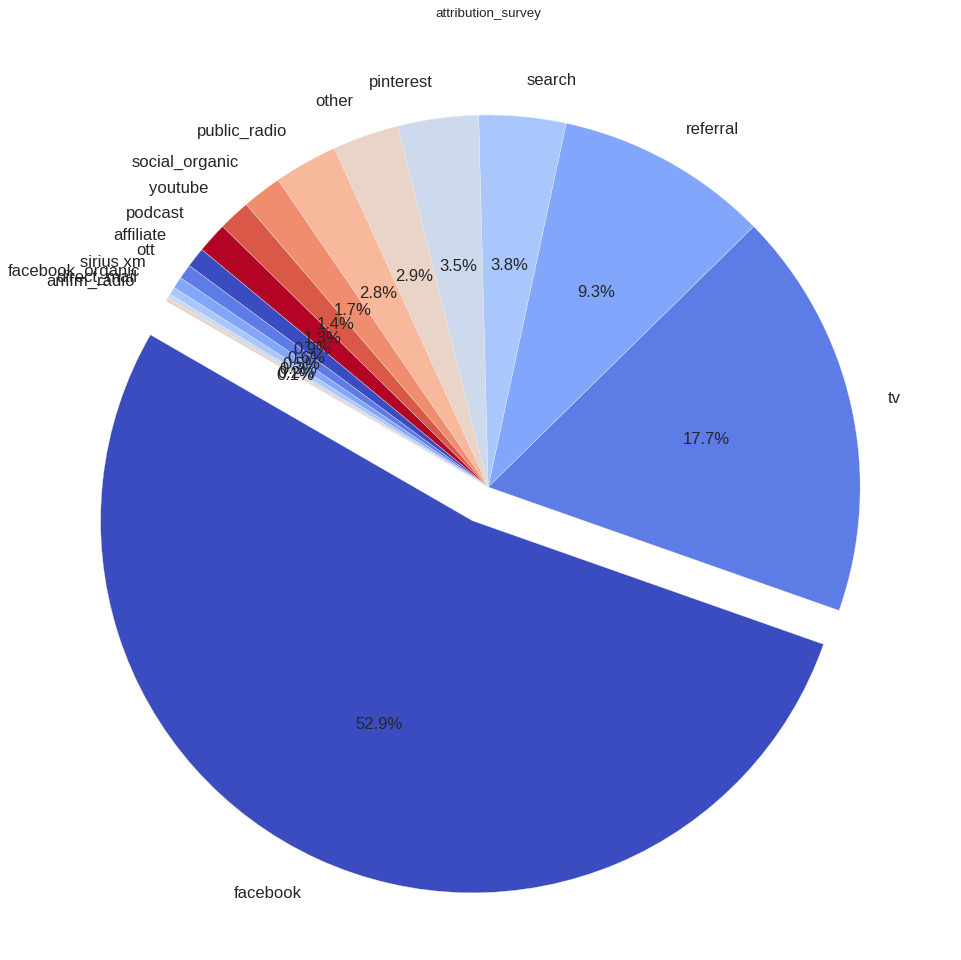

In [114]:
data = attribution['attribution_survey'].value_counts()
data
labels = data.index
# sizes = data
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
# plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.style.use("seaborn-notebook")
fig, ax = plt.subplots(figsize=(15, 15))
ax.legend(fontsize=20)
# ax.set_xlabel(fontsize=20)
plt.rcParams.update({'font.size': 15})
ax.pie(data,labels=labels,explode=explode,autopct='%1.1f%%',shadow=False,startangle=150,textprops= {'fontsize':15})
plt.title("attribution_survey")
plt.show()  

No handles with labels found to put in legend.


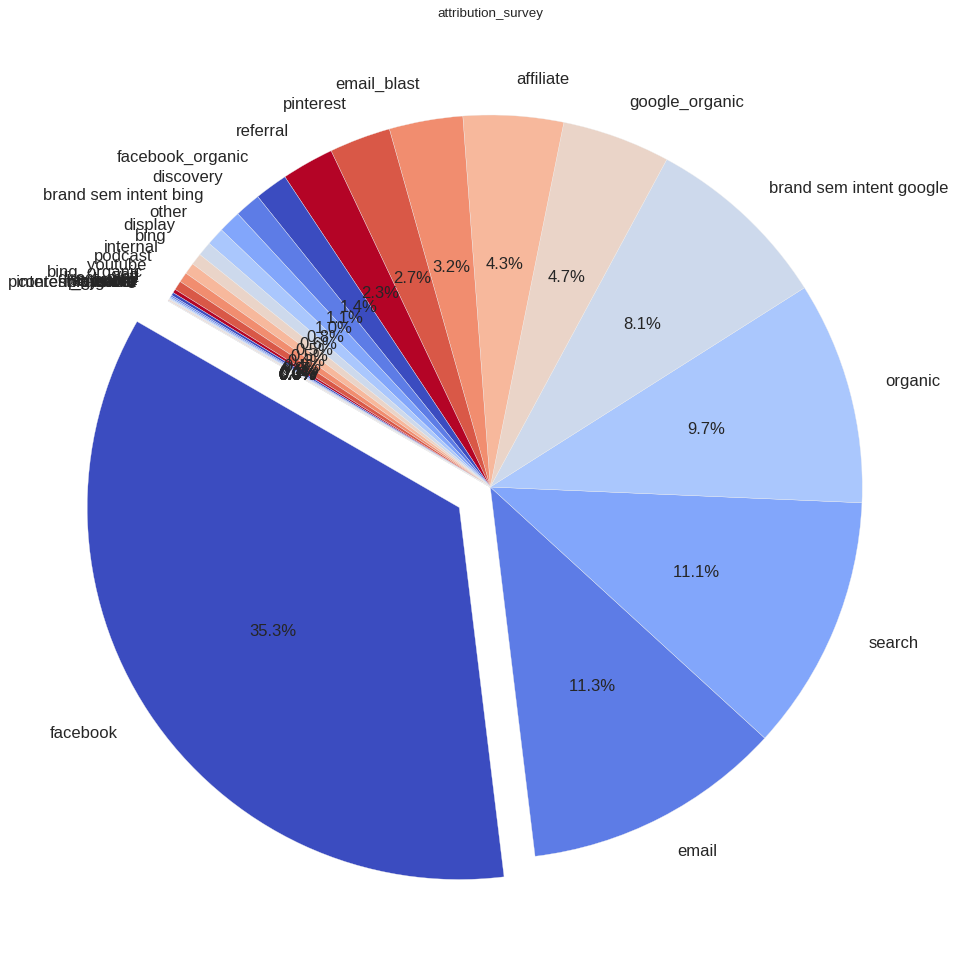

In [120]:
data = attribution['attribution_technical'].value_counts()
len(data)
labels = data.index
# sizes = data
explode = (0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
len(explode)
# plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=False,startangle=150)
plt.style.use("seaborn-notebook")
fig, ax = plt.subplots(figsize=(15, 15))
ax.legend(fontsize=20)
# ax.set_xlabel(fontsize=20)
plt.rcParams.update({'font.size': 15})
ax.pie(data,labels=labels,explode=explode,autopct='%1.1f%%',shadow=False,startangle=150,textprops= {'fontsize':15})
plt.title("attribution_survey")
plt.show()  

In [8]:
#========= Look at attribution data
attribution

,account_creation_date,attribution_technical,attribution_survey
162502,2020-01-24 21:44:16,facebook,facebook
380374,2020-03-01 15:44:35,facebook,facebook
496617,2019-12-07 16:37:06,organic,facebook
356799,2020-01-27 16:09:32,search,tv
681701,2019-10-05 12:57:07,discovery,youtube
...,...,...,...
509326,2019-11-17 14:12:33,facebook,facebook_organic
229587,2019-12-06 18:02:13,google_organic,referral
281340,2019-12-21 19:40:44,facebook,facebook
87198,2020-01-17 23:58:51,facebook,facebook


In [0]:
#========= Conduct allocation
#==== Suppose the account_creation_date could be seen as a signal
#==== Step one: If organic in technical, then the same as survey
organic_list = ['organic','google_organic','facebook_organic','bing_organic','pinterest_organic']

attribution['attribution_technical_new'] = attribution['attribution_technical']
index = attribution.loc[attribution['attribution_technical_new'].isin(organic_list),'attribution_technical_new'].index
attribution.loc[index,'attribution_technical_new'] = attribution.loc[index,'attribution_survey']

#==== Step two: Fill the nan data in survey and technical
index = attribution['attribution_technical_new'].isnull().index
attribution.loc[index,'attribution_technical_new'] = attribution.loc[index,'attribution_survey']

index = attribution['attribution_survey'].isnull().index
attribution.loc[index,'attribution_survey'] = attribution.loc[index,'attribution_technical_new']

attribution.fillna(value='other',inplace = True)

In [33]:
#========= Check the category of channel

attribution = subscribers[['account_creation_date','attribution_technical','attribution_survey']]
pd.DataFrame(attribution[['attribution_technical','attribution_survey']].apply(pd.value_counts,axis=0).T.stack(),columns=['counts']).reset_index().\
        sort_values(by=['level_0','counts'],ascending=[True,False])

,level_0,level_1,counts
36,attribution_survey,facebook,119126.0
47,attribution_survey,tv,39904.0
43,attribution_survey,referral,20882.0
44,attribution_survey,search,8492.0
40,attribution_survey,pinterest,7856.0
38,attribution_survey,other,6496.0
42,attribution_survey,public_radio,6219.0
46,attribution_survey,social_organic,3869.0
48,attribution_survey,youtube,3108.0
41,attribution_survey,podcast,2995.0


In [0]:
#========= Continue allocation
#==== Calculate the monthly advertising outcome
survey_attribution = attribution.resample('M',on = 'account_creation_date')['attribution_survey'].apply(pd.value_counts).unstack()
technical_attribution = attribution.resample('M',on = 'account_creation_date')['attribution_technical'].apply(pd.value_counts).unstack()

#==== fill the lost three channel in survey_attribution
lost_df = pd.DataFrame(data=0,columns=['email_blast', 'email', 'brand sem intent google'],index=survey_attribution.index)
survey_attribution = pd.merge(left=survey_attribution, right=lost_df, left_index=True, right_index=True)

#==== quote the columns needed
advertising_spend.set_index(keys='date', drop=True, inplace = True)

survey_attribution = survey_attribution[advertising_spend.columns]
technical_attribution = technical_attribution[advertising_spend.columns]



total_attribution = survey_attribution * 0.5 + technical_attribution * 0.5

In [0]:
attribution.loc[attribution['attribution_technical'] == 'email','attribution_survey'].value_counts()
#==== fill the lost three channel in survey_attribution
lost_df = pd.DataFrame(data=0,columns=['email_blast', 'email', 'brand sem intent google'],index=survey_attribution.index)

In [121]:
total_attribution

,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
account_creation_date,,,,,,,,
2019-06-30,1468.5,154.5,81.5,98.5,47.0,54.5,48.5,73.0
2019-07-31,12231.0,1630.0,932.0,1045.0,498.0,755.0,896.5,1168.0
2019-08-31,12627.0,1546.0,1362.5,947.5,1047.0,951.0,795.0,1252.0
2019-09-30,8915.5,1210.0,1317.5,765.0,620.0,791.0,640.5,1306.0
2019-10-31,11453.5,1152.5,1593.0,801.0,478.5,488.5,770.0,1363.0
2019-11-30,14962.5,1292.0,1687.0,1015.0,362.5,314.5,697.0,1487.5
2019-12-31,11341.0,1338.5,2401.0,1221.5,374.5,205.5,912.0,1542.5
2020-01-31,8223.0,1184.0,2612.0,1313.0,652.0,17.5,877.5,1555.0
2020-02-29,9898.5,1584.0,2822.0,1173.0,911.5,33.0,767.5,1670.5


In [46]:
CAC_df = advertising_spend / total_attribution
CAC_df

,facebook,email,search,brand sem intent google,affiliate,email_blast,pinterest,referral
date,,,,,,,,
2019-06-30,57.745999,485.436893,212.269939,217.258883,253.191489,192.660550,121.649485,83.561644
2019-07-31,4.905568,46.380368,18.562232,20.382775,24.096386,39.470199,6.692694,5.650685
2019-08-31,4.141918,49.223803,13.284404,22.480211,15.568290,69.295478,7.798742,5.431310
2019-09-30,5.496046,62.644628,14.345351,27.843137,26.451613,93.173198,9.367681,5.666156
2019-10-31,4.478980,65.943601,13.182674,26.716604,25.496343,66.120778,8.701299,5.355833
2019-11-30,3.749373,58.746130,12.685240,21.280788,32.275862,31.160572,9.038737,4.907563
2019-12-31,4.532228,56.854688,13.369429,18.174376,32.309746,17.031630,7.894737,5.186386
2020-01-31,5.958896,63.766892,12.863706,17.288652,21.932515,17.142857,7.635328,4.758842
2020-02-29,5.020963,48.358586,10.666194,18.499574,16.456391,9.090909,8.338762,3.891051


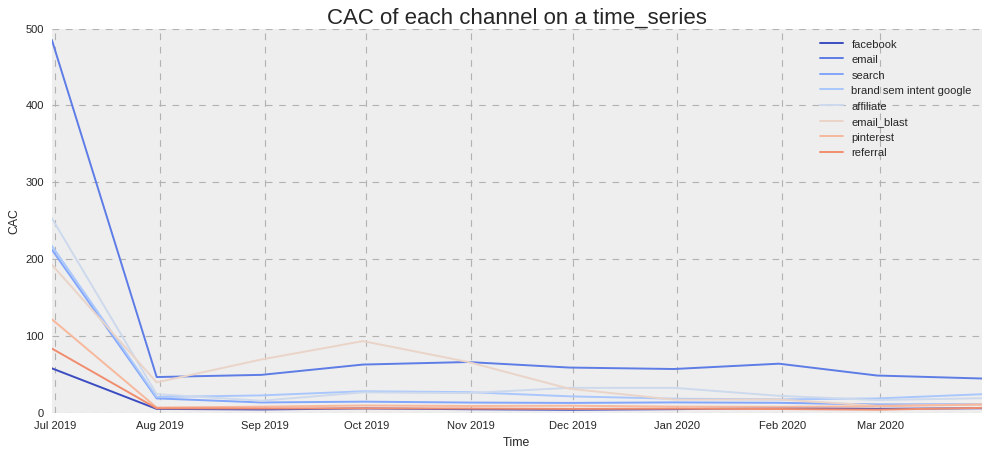

In [122]:
from matplotlib import rcParams, cycler

plt.style.use("seaborn-notebook")

data = CAC_df
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))

fig, ax = plt.subplots(figsize=(15, 6))
lines = ax.plot(CAC_df)

plt.ylabel('CAC')
plt.xlabel('Time')
plt.title('CAC of each channel on a time_series',fontdict={'size':20})
ax.legend(lines,CAC_df.columns)

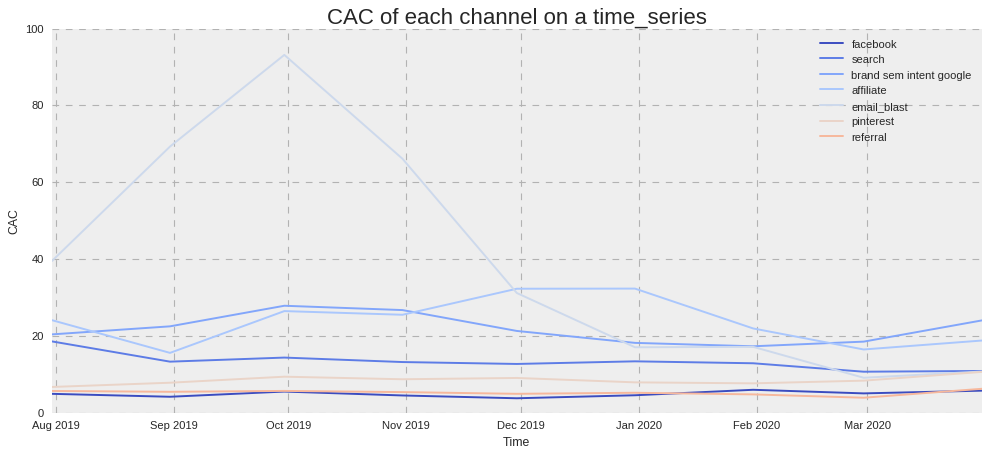

In [126]:
from matplotlib import rcParams, cycler

plt.style.use("seaborn-notebook")

data_ = CAC_df[['facebook', 'search', 'brand sem intent google', 'affiliate',
       'email_blast', 'pinterest', 'referral']]
data_ = data_.iloc[1:]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))

fig, ax = plt.subplots(figsize=(15, 6))
lines = ax.plot(data_)

plt.ylabel('CAC')
plt.xlabel('Time')
plt.title('CAC of each channel on a time_series',fontdict={'size':20})
ax.legend(lines,data_.columns)

In [123]:
CAC_df.columns

Index(['facebook', 'email', 'search', 'brand sem intent google', 'affiliate',
       'email_blast', 'pinterest', 'referral'],
      dtype='object')